In [1]:
import pandas as pd
import pyreadr
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [2]:
# Import the provided R data
res = pyreadr.read_r('Data\\miRNA_mRNA_Pr.Rdata')


In [3]:
df_mir = pd.DataFrame(res['mir.bdr'])  # microRNA
df_mrna = pd.DataFrame(res['mrna.bdr'])  # meseenger RNA data
df_pr = pd.DataFrame(res['pr.bdr'])  # protein data
df_pheno = pd.DataFrame(res['pheno'])  # phenotype data

We have 3 differenet components - microRNA,mRNA,Protein. The components has 517,20653,2869 features respectively, for each of the 60 individuals.


The df_pheno dataset contains the labels, named 'Braak Score'

The Braak scores:  31 control, 29 case

In [4]:
# renaming the scores to be more readable in plots
df_pheno['Braak'].replace('2', 'Case',inplace=True)
df_pheno['Braak'].replace('0','Control',inplace=True)
df_pheno['Braak'].value_counts()

Braak
Control    31
Case       29
Name: count, dtype: int64

Our data has the individual as the columns, which does not really make too much sense, the columns should be the attributes( ie the different kinds of mRNA etc.). So lets flip it.

In [5]:
# transposing each
df_mir = df_mir.transpose()
df_pr = df_pr.transpose()
df_mrna = df_mrna.transpose()

In [6]:
# add new column to each dataset, correspodning to the label, aka Braak Stage
df_mir_labelled = df_mir.join(df_pheno[['Braak']])
df_mrna_labelled = df_mrna.join(df_pheno[['Braak']])
df_pr_labelled = df_pr.join(df_pheno[['Braak']])


In [7]:

## get the correlations from feature selection, which was performed in Notebook - FeatureSelection
mir_corrs = pd.read_csv('Data\\mir_corr_ordered.csv',index_col=0)
pr_corrs = pd.read_csv('Data\\pr_corr_ordered.csv',index_col=0)
mrna_corrs = pd.read_csv('Data\\mrna_corr_ordered.csv',index_col=0)

In [8]:
# for mRNA, as mentioned in the paper, targeted feature selection is performed, as, otherwise, it ruins the separation of the model
# consequently, will only use mRNAs with threshold of 0.15 corelation wrt Label
threshold = 0.15
mrna_corrs_filtered = mrna_corrs.loc[mrna_corrs['Braak']>threshold]
mrna_corrs_filtered

,Braak
Braak,1.000000
ENSG00000252316,0.535008
ENSG00000275830,0.530265
ENSG00000120457,0.526989
ENSG00000279443,0.517781
...,...
ENSG00000270115,0.150167
ENSG00000179104,0.150150
ENSG00000238917,0.150143
ENSG00000232504,0.150116


In [9]:
# keep only top mRNAs in the dataframe
df_mrna_labelled = df_mrna_labelled[mrna_corrs_filtered.index]
df_mrna_labelled

,Braak,ENSG00000252316,ENSG00000275830,ENSG00000120457,ENSG00000279443,ENSG00000180251,ENSG00000259433,ENSG00000273100,ENSG00000276054,ENSG00000241322,...,ENSG00000196275,ENSG00000105287,ENSG00000260672,ENSG00000216937,ENSG00000286635,ENSG00000270115,ENSG00000179104,ENSG00000238917,ENSG00000232504,ENSG00000160908
BBN002_26311,Control,0.666732,-0.267633,0.682570,-1.629278,-1.274714,-3.075459,-2.418930,-1.335117,-0.889593,...,3.493094,3.719491,-2.182374,6.373477,1.039217,-0.268104,5.937413,-0.133065,-0.451191,3.947200
BBN002_26316,Control,-4.358498,-0.176456,-0.117856,-1.201646,-1.185613,-0.403226,-1.003619,-1.140908,-2.580969,...,3.668861,4.433802,-0.672413,6.198957,0.382035,-1.870353,5.904861,-0.629984,0.064552,3.970943
BBN002_28350,Control,0.449016,1.545715,0.907122,-0.831653,-0.887544,-1.483043,-2.412425,-1.652470,-1.341736,...,3.283597,3.225340,-1.969156,5.393021,0.443137,-1.462318,6.254910,-0.540121,-0.319740,3.302802
BBN002_28543,Case,2.092701,1.977128,0.991313,-0.473272,-1.345327,-2.213560,-0.728834,-1.274626,-1.657205,...,3.038318,3.703952,-2.661788,5.376322,0.885190,-2.420780,5.091884,0.327780,-1.850542,3.291282
BBN002_29087,Control,1.464152,0.868355,0.488612,-1.266294,-1.192444,-0.835660,-1.702393,-1.303785,-1.325972,...,3.399267,2.981587,-1.702393,5.141873,0.481271,-1.541929,5.204879,0.578284,-0.835660,3.134565
BBN002_29471,Control,0.736829,0.985717,1.222954,-1.419715,-0.705141,-4.087532,-3.350566,-0.246834,-1.970945,...,2.354018,5.186368,-1.765604,5.447446,1.181726,-1.028638,5.582145,1.818910,-1.280177,4.267426
BBN002_30035,Control,1.135985,1.625273,1.244050,-1.306725,-0.825024,-6.351469,0.349110,-1.592633,-1.673059,...,3.178992,3.677821,-2.103238,5.251063,0.289817,-1.142015,6.114220,1.687044,0.728677,3.421555
BBN002_30127,Case,1.398625,1.453900,1.680123,-0.986082,-1.429921,-2.118562,-0.271036,-1.371819,-0.175953,...,2.939255,3.551739,-2.118562,5.293821,0.849388,-0.848473,5.679199,0.545466,0.493832,3.375602
BBN002_30920,Control,-0.561616,0.722898,0.868562,-0.323249,-0.056654,-1.990459,-4.105937,-0.853763,-0.854773,...,3.310622,3.458640,-0.264634,5.614057,3.104043,0.331469,5.420967,-0.372510,-0.083865,4.004712
BBN003_26927,Control,1.246271,1.111176,0.583359,-1.407833,-0.638404,-5.807687,-5.807687,-0.989144,-1.370726,...,3.890937,3.331721,-0.135262,5.200685,1.436971,-0.763293,5.218255,0.323202,-1.163831,3.362834


At this moment, let's try some PCA, before going into OnPLS

In [10]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from yellowbrick import features


def std_scale(df, is_df):
    if is_df:
        X = df.values
    else:
        X = df

    scaler = StandardScaler()
    scaler.fit(X)

    return scaler.transform(X)


def apply_pca_all(X):
    # dont set # of components such as to leave all of them
    pca_all = decomposition.PCA(random_state=2020)
    pca_all.fit(X)

    return pca_all.transform(X), pca_all


def apply_pca_n(X, n):
    # dont set # of components such as to leave all of them
    pca_all = decomposition.PCA(n_components=n, random_state=2020)
    pca_all.fit(X)

    return pca_all.transform(X), pca_all


def plot_scree(pca1, title, color):
    cumsum = np.cumsum(pca1.explained_variance_ratio_ * 100)
    plt.plot(cumsum, color=color)

    plt.title(title)
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance')

    plt.show()


def pca_scatter(pca_n, labels):
    plt.figure(figsize=(10, 7))

    sns.scatterplot(x=pca_n[:, 0], y=pca_n[:, 1], s=40,
                    hue=labels, palette=['green', 'blue'])
    plt.title('2D PCA Score Scatterplot')
    plt.xlabel('PC1')
    plt.ylabel('PC2')


def yellow_scatter(values, labels, title, n_components=2):
    le = LabelEncoder()
    le.fit(labels)
    labels = le.transform(labels)

    visualizer_2 = features.PCA(scale=True, projection=n_components, classes=['Braak 0', 'Braak 2'], random_state=2020,
                                colors=['red', 'blue'], title=title, proj_features=False)
    plt.title(title)
    visualizer_2.fit_transform(values, labels)
    visualizer_2.show()


def biplot_2d(pca_n, pca_values,df, n_loadings, feature_names, title,plot_loadings=True):
    pca_df = pd.DataFrame(pca_values, columns=['PC1', 'PC2'],index=df.index)
    pca_df = pca_df.join(df['Braak'])

    pca_df_scaled = pca_df.copy()
    scaler_df = pca_df[['PC1', 'PC2']]
    scaler = 1 / (scaler_df.max() - scaler_df.min())

    for index in scaler.index:
        pca_df_scaled[index] *= scaler[index]

    ## loadings
    loadings = pca_n.components_.T * np.sqrt(pca_n.explained_variance_)
    loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=feature_names)

    #loading_matrix = loading_matrix.sort_values(by=loadings_pc,key=abs,ascending=False) prioritize loading of one PC
    sorted_indices = (np.abs(loading_matrix['PC1']) + np.abs(loading_matrix['PC2'])).sort_values(ascending=False).index
    loading_matrix = loading_matrix.loc[sorted_indices, :]

    xs = loading_matrix['PC1']#.values[:n_loadings]
    ys = loading_matrix['PC2']#.values[:n_loadings]



    # Plot the loadings on a scatterplot
    sns.lmplot(
        x='PC1',
        y='PC2',
        data=pca_df_scaled,
        fit_reg=False,
        hue='Braak',
        scatter_kws={"s": 30}
    )
    if plot_loadings:
        for i, varnames in enumerate(loading_matrix.index):#[:n_loadings]):
            plt.scatter(xs[i], ys[i], s=30,color='r',marker='>')
            plt.arrow(
                0, 0,  # coordinates of arrow base
                xs[i],  # length of the arrow along x
                ys[i],  # length of the arrow along y
                color='r',
                head_width=0.01
                ,width = 0.01
                ,linewidth=0.01 #dont show arrows
            )
            #plt.text(xs[i], ys[i], varnames)

    xticks = np.linspace(-0.8, 0.8, num=5)
    yticks = np.linspace(-0.8, 0.8, num=5)
    plt.xticks(xticks)
    plt.yticks(yticks)

    explained1 = 'PC1(' + str(int(pca_n.explained_variance_ratio_[0]*100)) + '%)'
    explained2 = 'PC2(' + str(int(pca_n.explained_variance_ratio_[1]*100)) + '%)'



    plt.xlabel(explained1)
    plt.ylabel(explained2)

    plt.title(title)
    plt.show()



In [11]:
# extract and Standardize the values for each block
mir_values = std_scale(df_mir_labelled.drop('Braak',axis=1), True)
pr_values = std_scale(df_pr_labelled.drop('Braak',axis=1), True)
mrna_values = std_scale(df_mrna_labelled.drop('Braak',axis=1), True)

In [12]:
# build the ONPLS component with all components
mir_pca_vals, mir_pca_all = apply_pca_all(mir_values)
pr_pca_vals, pr_pca_all = apply_pca_all(pr_values)
mrna_pca_vals, mrna_pca_all = apply_pca_all(mrna_values)

Let's now make a scree plot, to see how many components we need to accurately predict original data.

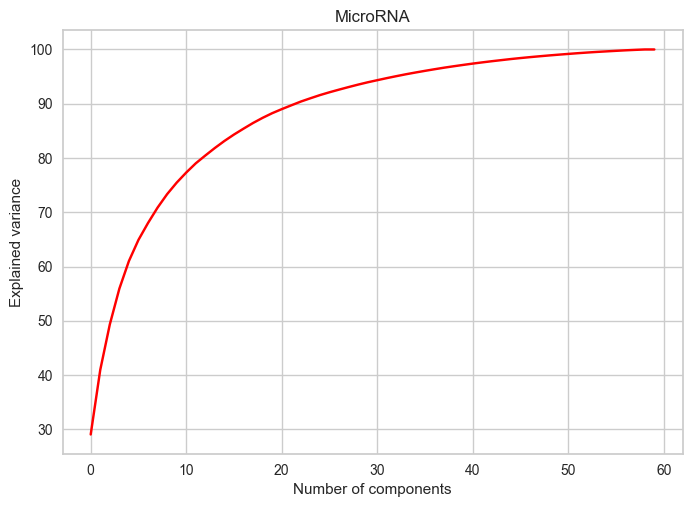

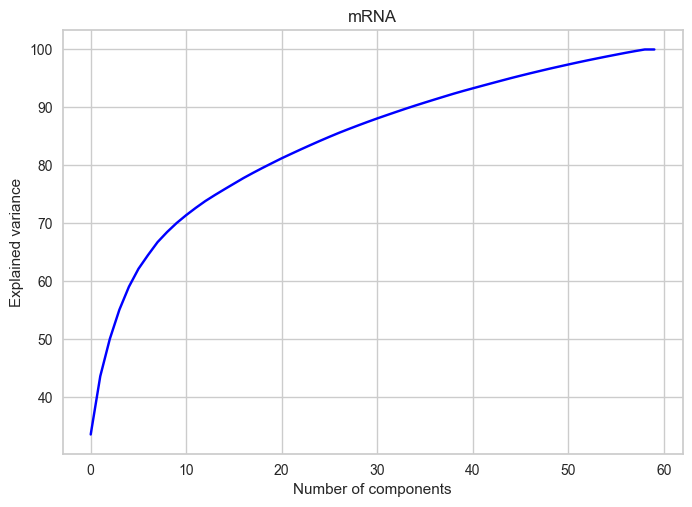

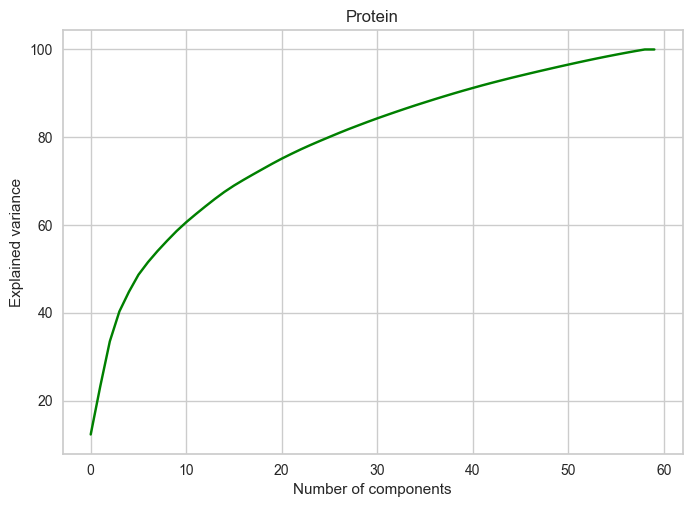

In [13]:
plot_scree(mir_pca_all, 'MicroRNA', 'red')
plot_scree(mrna_pca_all, 'mRNA', 'blue')
plot_scree(pr_pca_all, 'Protein', 'green')

From the scree plots we can separately say how much variance is explained for each datatype:

- microRNA: First 10 explain ~78
- mRNA : First 10 explain ~70
- protein : First 10 explain ~60


Now, will see how much variance do the first two components explain for each block. Additionally, we can look at the scores plot,
where labels are also present.


In [14]:
n = 2

mir_pca_n_vals, mir_pca_n = apply_pca_n(mir_values, n)
pr_pca_n_vals, pr_pca_n = apply_pca_n(pr_values, n)
mrna_pca_n_vals, mrna_pca_n = apply_pca_n(mrna_values, n)



In [15]:
print(' microRNA : Variance explained by ' + str(n) + ' components = ',
      np.sum(mir_pca_n.explained_variance_ratio_ * 100))
print(' protein : Variance explained by ' + str(n) + ' components = ', np.sum(pr_pca_n.explained_variance_ratio_ * 100))
print(' mRNA : Variance explained by ' + str(n) + ' components = ', np.sum(mrna_pca_n.explained_variance_ratio_ * 100))


 microRNA : Variance explained by 2 components =  40.95914628175082
 protein : Variance explained by 2 components =  23.26085679970992
 mRNA : Variance explained by 2 components =  43.63658899670198


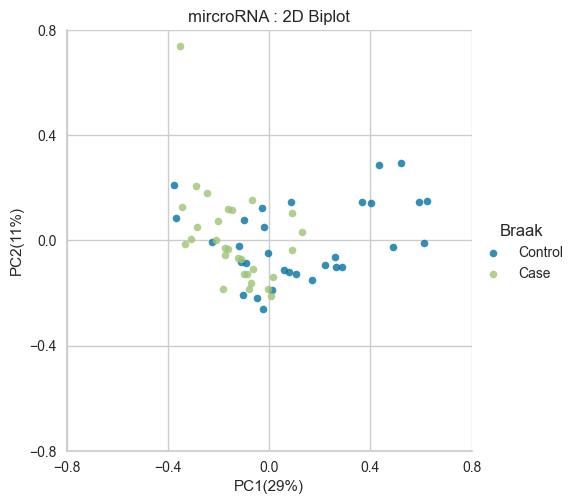

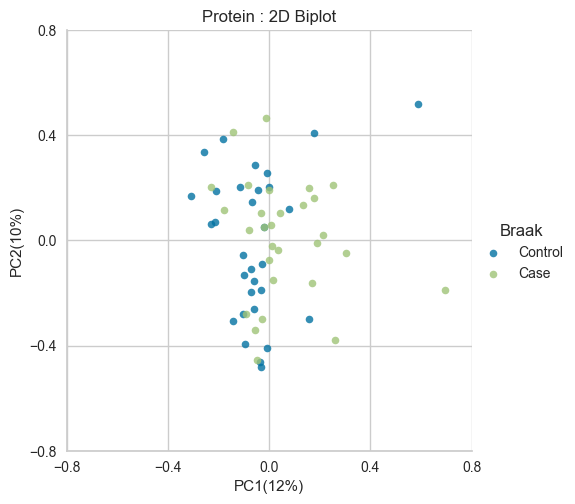

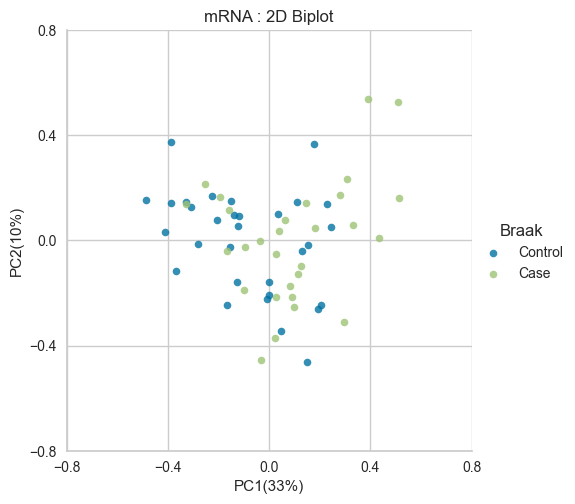

In [16]:
# biplots of each of the 3 datasets
n_loadings = 100
biplot_2d(mir_pca_n, mir_pca_n_vals,df_mir_labelled, n_loadings, df_mir.columns, 'mircroRNA : 2D Biplot',plot_loadings=False)
biplot_2d(pr_pca_n, pr_pca_n_vals, df_pr_labelled,n_loadings, df_pr.columns, 'Protein : 2D Biplot',plot_loadings=False
          )
biplot_2d(mrna_pca_n, mrna_pca_n_vals,df_mrna_labelled, n_loadings, df_mrna_labelled.drop(['Braak'],axis=1).columns, 'mRNA : 2D Biplot',plot_loadings=False)

From each of the scores plots we can see separation along the PC1 axis. For mRNA and microRNA this is especially promising as they explain 29 and 33 percent of the variance, while for Protein it explains only 12.

Let's test how many PCs are needed to explain some percent of variance

In [17]:
n = 0.5

mir_pca_n_vals, mir_pca_n = apply_pca_n(mir_values, n)
pr_pca_n_vals, pr_pca_n = apply_pca_n(pr_values, n)
mrna_pca_n_vals, mrna_pca_n = apply_pca_n(mrna_values, n)

print('We need ' + str(mir_pca_n_vals.shape[1]) + ' to explain ' + str(n * 100) + '% of variance for microRNA data ')
print('We need ' + str(pr_pca_n_vals.shape[1]) + ' to explain ' + str(n * 100) + '% of variance for Protein data ')
print('We need ' + str(mrna_pca_n_vals.shape[1]) + ' to explain ' + str(n * 100) + '% of variance for mRNA data ')

We need 4 to explain 50.0% of variance for microRNA data 
We need 7 to explain 50.0% of variance for Protein data 
We need 3 to explain 50.0% of variance for mRNA data 


As expected from what we previously saw, the Protein data is much less explainable than the other two.



### OnPLS

In [18]:
# the OnPLS package was taken from https://github.com/tomlof/OnPLS/tree/master
import OnPLS


# this method takes in the Blocks and the configuration of how many global,local components to build, it
# builds the model and returns the model and the R2 score as a metric
def computeOnPLS(Xs, predComp, orthComp, verbose, cv_rounds=0):
    onpls = OnPLS.estimators.OnPLS(predComp, orthComp, verbose=verbose)

    # NEED TO COPY, seems like otherwise results get messed up
    # OR instead of a List variable like 'Xs' need to have [X1,..,Xn] (very weird)

    onpls.fit(Xs.copy())

    # Perform prediction of all matrices from all connected matrices
    Xhat = onpls.predict(Xs.copy())

    # Compute prediction score
    score = onpls.score(Xs.copy())
    #print('\n The R2 score is : ' + str(score))

    cv_scores = OnPLS.resampling.cross_validation(onpls, Xs.copy(), cv_rounds=cv_rounds)
    ##print(cv_scores)

    return onpls, np.average(cv_scores)

In [19]:
from sklearn import preprocessing

# standardize
mir_values_std = preprocessing.StandardScaler().fit_transform(mir_values)
pr_values_std = preprocessing.StandardScaler().fit_transform(pr_values)
mrna_values_std = preprocessing.StandardScaler().fit_transform(mrna_values)


#### Removing Possible Noise
The data might be noisy, so we can look at the histogram of each dataset, and check if its bimodal, or if it has a long tail, then it might have noise in it.

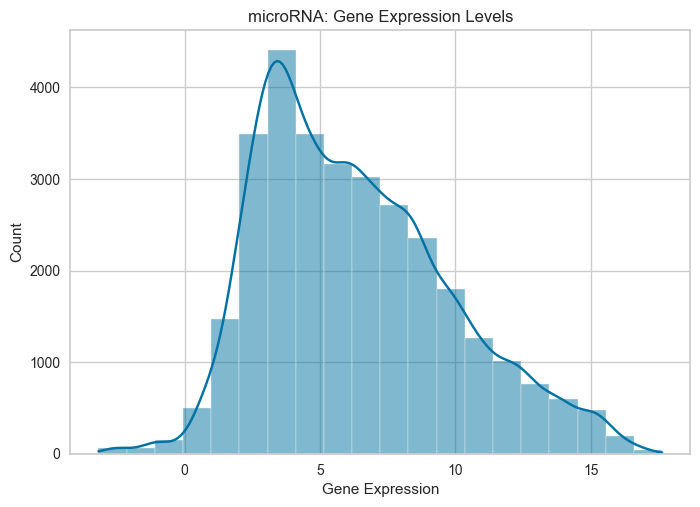

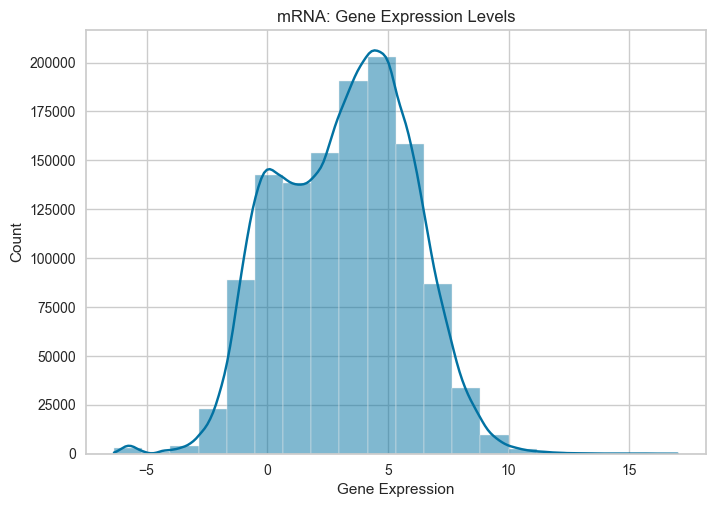

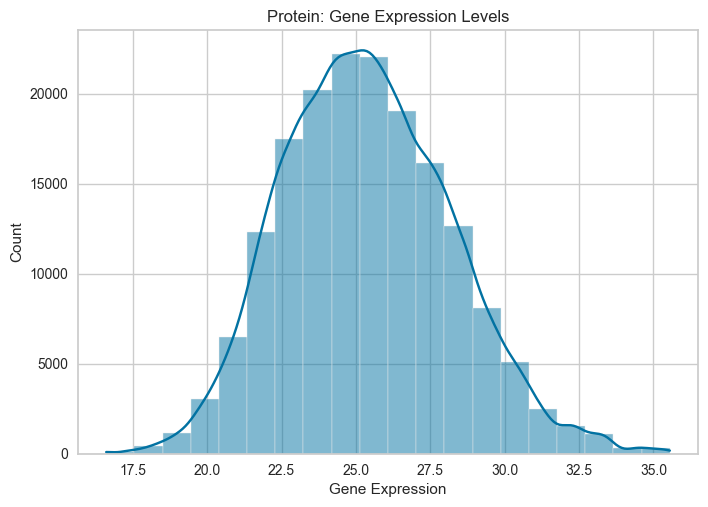

In [20]:
#(font_scale=1.5)


mir_values_flattened = df_mir.values.flatten()
mrna_values_flattened = df_mrna.values.flatten()
pr_values_flattened = df_pr.values.flatten()

ax = sns.histplot(data=mir_values_flattened, kde=True, bins=20)
ax.set(xlabel='Gene Expression', ylabel='Count', title='microRNA: Gene Expression Levels')
plt.show()

ax = sns.histplot(data=mrna_values_flattened, kde=True, bins=20)
ax.set(xlabel='Gene Expression', ylabel='Count', title='mRNA: Gene Expression Levels')
plt.show()

ax = sns.histplot(data=pr_values_flattened, kde=True, bins=20)
ax.set(xlabel='Gene Expression', ylabel='Count', title='Protein: Gene Expression Levels')
plt.show()

#### Conclusions by looking at the hists:
- microRNA : Substantial long tail, quite right skewed
- mRNA : Slightly bimodal? Especially we can see one of the modes being around 0.
- Protein : Looks normal enough

#### Feature Selection:

By looking at the histograms, we can see that there may be some noise ( lowly expressed genes) , so let's try to remove a gene if has too many lowly expressed rows.

<br>
After several different attempts, the feature selection method to remove noise looks at a Gene Expression threshho;d and number of samples that exceed that threshold.

So if 10 samples out of the 60 are bellow that threshhold, the variables are removed.
#### Different Expression Levels
 - MicroRNA
    - Expression Threshold: 3;
    - Gene Threshhold: 10;
 - Protein
    - Expression Threshold: 3;
    - Gene Threshhold: 10;
 - mRNA
    - Expression Threshold: 0;
    - Gene Threshhold: 10;

In [21]:
def feature_selection(values, expression_thresh_u=np.PINF, expression_thresh_l=np.NINF, gene_thresh=10):
    new_vals = []

    for gene in values:
        low_count = np.sum(np.where(np.logical_and(gene > expression_thresh_l, gene < expression_thresh_u), 0, 1))
        if low_count < gene_thresh:
            new_vals.append(gene)

    return np.array(new_vals).T


def feature_selection_df(df, expression_thresh_u=np.PINF, expression_thresh_l=np.NINF, gene_thresh=10):
    new_vals = []
    new_vals_idx = []
    for index, gene in df.iterrows():
        low_count = np.sum(np.where(np.logical_and(gene > expression_thresh_l, gene < expression_thresh_u), 0, 1))
        if low_count < gene_thresh:
            new_vals.append(gene)
            new_vals_idx.append(index)

    return np.array(new_vals).T, new_vals_idx



In [22]:
#filtered_mrna_diff, mrna_features = feature_selection_df(df_mrna.transpose(), expression_thresh_l=0, gene_thresh=10)
filtered_mrna_diff, mrna_features = feature_selection_df(df_mrna_labelled.drop('Braak',axis=1).transpose(), expression_thresh_l=0, gene_thresh=10)
filtered_mir_diff, mir_features = feature_selection_df(df_mir.transpose(), expression_thresh_l=3, gene_thresh=10)
filtered_pr_diff, pr_features = feature_selection_df(df_pr.transpose(), expression_thresh_l=3, gene_thresh=10)

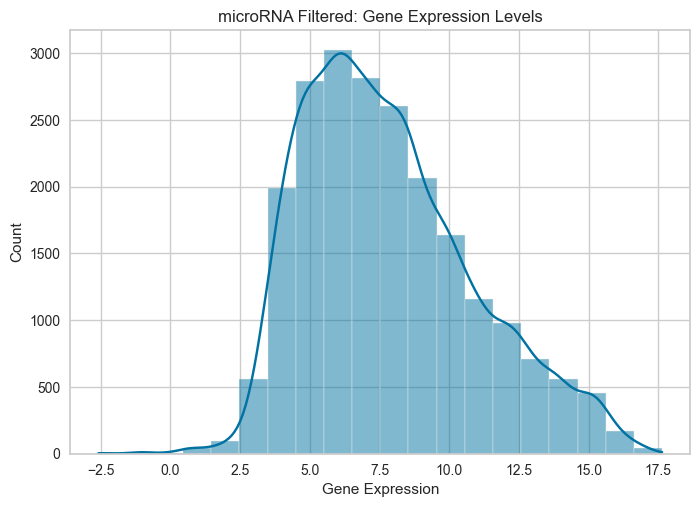

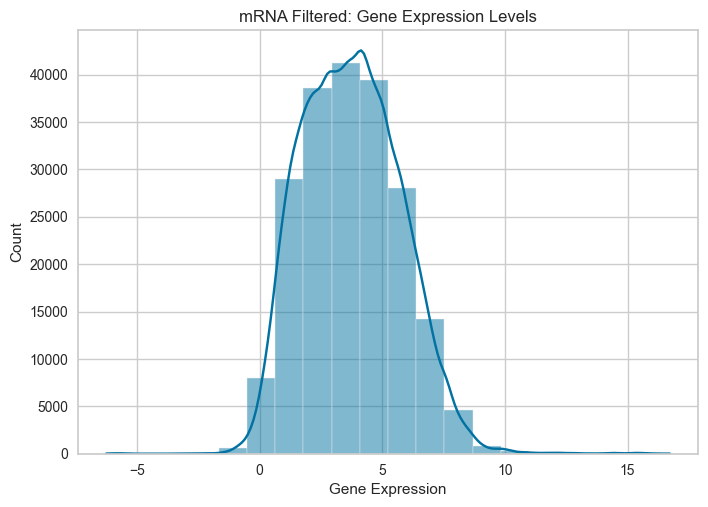

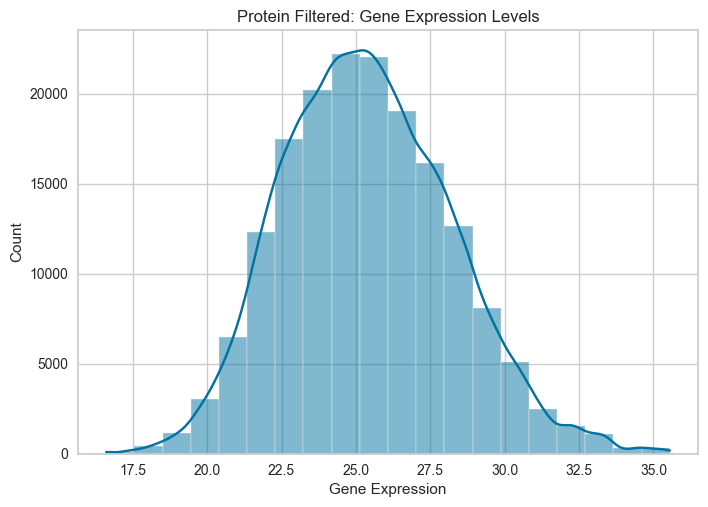

In [23]:
ax = sns.histplot(data=filtered_mir_diff.flatten(), kde=True, bins=20)
ax.set(xlabel='Gene Expression', ylabel='Count', title='microRNA Filtered: Gene Expression Levels')
plt.show()

ax = sns.histplot(data=filtered_mrna_diff.flatten(), kde=True, bins=20)
ax.set(xlabel='Gene Expression', ylabel='Count', title='mRNA Filtered: Gene Expression Levels')
plt.show()

ax = sns.histplot(data=filtered_pr_diff.flatten(), kde=True, bins=20)
ax.set(xlabel='Gene Expression', ylabel='Count', title='Protein Filtered: Gene Expression Levels')
plt.show()


After noise was removed, we train the OnPLS model. With 2 global components and 0 local ones.


In [24]:
cs = 2
cos = 1
predComp = [[0, cs, cs], [cs, 0, cs], [0, cs, cs]]
orthComp = [cos, cos, cos]


onpls2,score = computeOnPLS([std_scale(filtered_mir_diff, False), std_scale(filtered_pr_diff, False), std_scale(filtered_mrna_diff, False)],
                       predComp, orthComp, verbose=3, cv_rounds=0)

Creating combined loadings ...
Combined loadings created!
Filtering matrices ...
Matrix 0, orthogonal component 0, T'*to overlap: 3570313.212377, norm po: 1.438892, R2(to*po'): 0.000008
Matrix 1, orthogonal component 0, T'*to overlap: 35346155.051065, norm po: 1.469495, R2(to*po'): 0.000000
Matrix 2, orthogonal component 0, T'*to overlap: 189893142.058663, norm po: 1.613441, R2(to*po'): 0.000001
Matrices filtered!
Building globally joint OnPLS model ...
Calculating component 1 ...
DONE! f = 136506.13421353
Calculating component 2 ...
DONE! f = 56504.45691881
OnPLS model created with 2 components! ftot = 193010.591132


d:\python_program\thesiscode_fin\venv\lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
d:\python_program\thesiscode_fin\venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [25]:


def biplot2d_onpls(onpls1, df, block, features, n_loadings, title, use_weights=False,loading_both=True,loading_PC1=False,loading_PC2=False,show_loading_labels=True,show_scores=True,show_all_loadings=False):
    # n_loadings = 10
    # title = 'OnPLS microRNA: 2D biplot'

    pca_df = pd.DataFrame(onpls1.T[block], columns=['PC1', 'PC2'],index=df.index)

    pca_df = pca_df.join(df['Braak'])

    pca_df_scaled = pca_df.copy()

    scaler_df = pca_df[['PC1', 'PC2']]
    scaler = 1 / (scaler_df.max() - scaler_df.min())

    for index in scaler.index:
        pca_df_scaled[index] *= scaler[index]

    ## loadings/weights
    if use_weights:
        loadings = onpls1.W[block]
    else:
        loadings = onpls1.P[block]*5
    loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=features)




    if loading_both:
        sorted_indices = (np.abs(loading_matrix['PC1']) + np.abs(loading_matrix['PC2'])).sort_values(ascending=False).index
    elif loading_PC1:
        #sorted_indices = loading_matrix.sort_values(by='PC1',key=abs,ascending=False).index #prioritize loading of one PC
        sorted_indices = (np.abs(loading_matrix['PC1']) - np.abs(loading_matrix['PC2'])).sort_values(ascending=False).index
    else:
        sorted_indices = loading_matrix.sort_values(by='PC2',key=abs,ascending=False).index #prioritize loading of one PC


    if not show_all_loadings:
        loading_matrix = loading_matrix.loc[sorted_indices, :]



    if use_weights:
        print('Weights shown: ')
    else:
        print('Loadings shown: ')
    print(loading_matrix.head(n_loadings))

    if show_all_loadings:
        xs = loading_matrix['PC1'].values
        ys = loading_matrix['PC2'].values
    else:
       xs = loading_matrix['PC1'].values[:n_loadings]
       ys = loading_matrix['PC2'].values[:n_loadings]
    # Plot the loadings on a scatterplot


    if show_scores:
        sns.lmplot(
            x='PC1',
            y='PC2',
            data=pca_df_scaled,
            fit_reg=False,
            hue='Braak',
             scatter_kws={"s": 30}
        )

    for i, varnames in enumerate(loading_matrix.index[:n_loadings]):
        plt.scatter(xs[i], ys[i], s=15,color='r',marker='>')
        plt.arrow(
            0, 0,  # coordinates of arrow base
            xs[i],  # length of the arrow along x
            ys[i],  # length of the arrow along y
            color='r',
            head_width=0.0001,
            head_length=0.001,
            width = 0.0001
          ,linewidth=0.01 #dont show arrows
        )
        if show_loading_labels:
            plt.text(xs[i], ys[i], varnames,fontsize=9)


    if show_scores:
        xticks = np.linspace(-0.8, 0.8, num=5)
        yticks = np.linspace(-0.8, 0.8, num=5)
        plt.xticks(xticks)
        plt.yticks(yticks)
    else:
        max_x = np.max(xs)
        max_y = np.max(ys)

        xticks = np.linspace(-max_x-0.4*max_x, max_x+0.4*max_x,num=10)
        yticks = np.linspace(-max_y-0.4*max_y, max_y+0.4*max_y,num=10)
        plt.xticks(xticks)
        plt.yticks(yticks)

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.title(title)
    plt.show()




#### Displaying the Loadings from Onpls of each block.

Note: The values of the nodes displayed are multiplied by 5, so the general influence of the variance is visible.

Loadings shown: 
                      PC1       PC2
hsa-let-7a-3p    0.372478  0.020428
hsa-let-7a-5p    0.199496 -0.194522
hsa-let-7b-3p   -0.107703 -0.455528
hsa-let-7b-5p   -0.011844 -0.456127
hsa-let-7c-5p   -0.032966 -0.112782
...                   ...       ...
hsa-miR-15a-5p   0.422220  0.032604
hsa-miR-15b-5p   0.152337 -0.284197
hsa-miR-16-2-3p  0.389635  0.153615
hsa-miR-16-5p    0.427121 -0.010359
hsa-miR-17-5p    0.460852  0.047849

[100 rows x 2 columns]


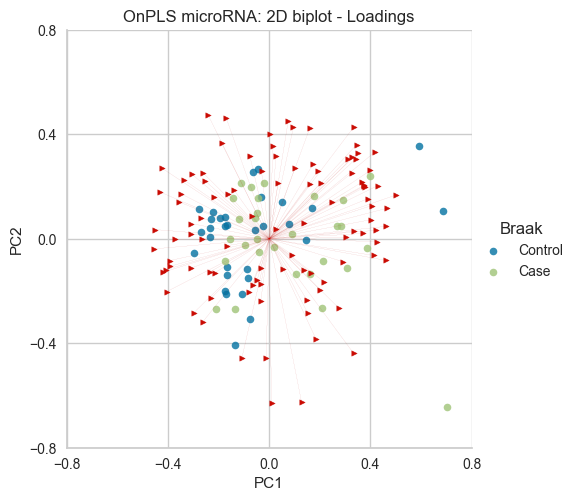

Loadings shown: 
               PC1       PC2
P68371   -0.038233 -0.112064
P04350   -0.119935 -0.219866
Q13885   -0.170686 -0.098847
Q9BVA1    0.111845 -0.182545
P07437    0.010555 -0.075360
...            ...       ...
P22314   -0.008195 -0.107791
Q14195-2  0.124356 -0.151518
Q92752   -0.164062 -0.114929
P32119    0.189268  0.126351
O94760-1  0.004435 -0.086205

[100 rows x 2 columns]


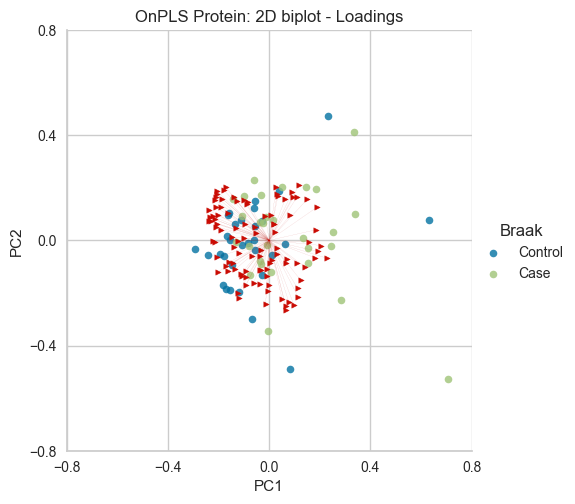

Loadings shown: 
                      PC1       PC2
ENSG00000252316  0.059902  0.008803
ENSG00000275830  0.080331  0.052220
ENSG00000120457  0.075157 -0.009910
ENSG00000233670  0.058556 -0.048054
ENSG00000026297  0.098224  0.120465
...                   ...       ...
ENSG00000198429  0.093855  0.120997
ENSG00000183091  0.034211  0.102088
ENSG00000196705  0.113021  0.015651
ENSG00000176593  0.075237 -0.028736
ENSG00000187554  0.123464  0.086188

[100 rows x 2 columns]


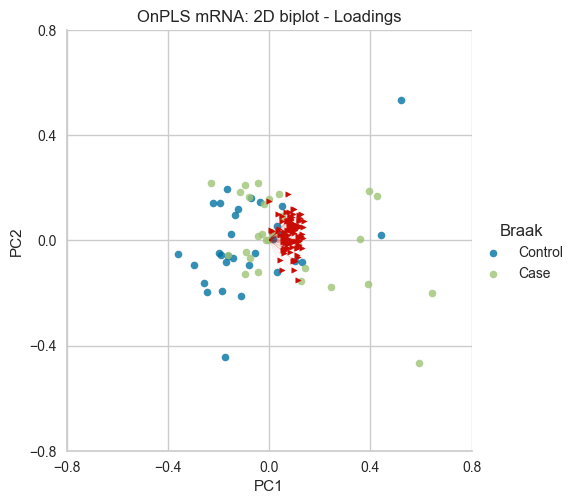

In [26]:
n_loadings = 100
biplot2d_onpls(onpls2,df_mir_labelled,0,mir_features,n_loadings,'OnPLS microRNA: 2D biplot - Loadings',show_loading_labels=False,show_all_loadings=True)
biplot2d_onpls(onpls2,df_pr_labelled,1,pr_features,n_loadings,'OnPLS Protein: 2D biplot - Loadings',show_loading_labels=False,show_all_loadings=True)
biplot2d_onpls(onpls2, df_mrna_labelled, 2, mrna_features, n_loadings, 'OnPLS mRNA: 2D biplot - Loadings',show_loading_labels=False,show_all_loadings=True)

Seems like the loadings/weights are very very low. But need to take into account that there are thousands of variables for each block, so each one in particular will have small influence on the PCs.

So, will the loadings only be useful for selecting best variables, from each block. And if so, would I just keep these rows for each individual?

<br> <br><br>
#### Now, try to understand more about the functions here, how global/local components represented in the onpls object

In [27]:
max_comps = 5

pred_grid = OnPLS.utils.list_product([[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                                     [[max_comps, max_comps, max_comps], [max_comps, max_comps, max_comps], [max_comps, max_comps, max_comps]]
                                     ,is_pred=True)

In [28]:
pred_grid_global = []
n = 51
for i in range(1,n):
    pred_grid_global.append([[0, i, i], [i, 0, i], [i, i, 0]])


In [29]:
pred_grid_local = []
for i in range(5,10):
    pred_grid_local.append([[0, i+1, 5], [i+1, 0, 5], [5,5, 0]])
    pred_grid_local.append([[0, 5, i+1], [5, 0, i], [i+1, 5, 0]])
    pred_grid_local.append([[0, 5, i], [5, 0, i+1], [5, i+1, 0]])

In [30]:
predxscore = []
filtered_std_mir_diff = std_scale(filtered_mir_diff,False)
filtered_std_pr_diff = std_scale(filtered_pr_diff,False)
filtered_std_mrna_diff = std_scale(filtered_mrna_diff,False)


orth = [0,0,0]

for pred in pred_grid_global:
    onpls_l,score = computeOnPLS([filtered_std_mir_diff, filtered_std_pr_diff, filtered_std_mrna_diff],
                       pred, orth, verbose=0, cv_rounds=5)
    #print('PredComp: ', pred)
    #print('R2 CV Score: ' + str(score))
    #print('------------------------------\n')
    predxscore.append([pred[0][1],score])

pd.DataFrame(predxscore,columns=['GlobalComps','Score']).to_csv('Data\\PredictionCompxR2Score_Global.csv')

#### 1) Average scores scatterplot


Text(0.5, 1.0, 'Averaged Scores of OnPLS - Scatterplot')

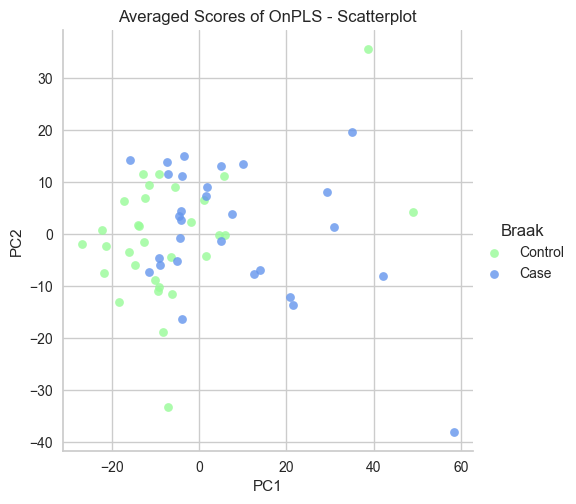

In [31]:
from matplotlib.lines import Line2D
#sns.set(font_scale=1.5)


averaged_scores = (onpls2.T[0] + onpls2.T[1] + onpls2.T[2])/len(onpls2.T)
#averaged_scores = (onpls2.T[0] + onpls2.T[1])/(len(onpls2.T)-1)

data = np.append(averaged_scores,onpls2.T[0],axis=1)
data = np.append(data,onpls2.T[1],axis=1)
data = np.append(data,onpls2.T[2],axis=1)

pca_df = pd.DataFrame(data, columns=['PC1_avg', 'PC2_avg','PC1_mir','PC2_mir','PC1_pr','PC2_pr','PC1_mrna','PC2_mrna'],index=df_mir_labelled.index)
pca_df = pca_df.join(df_mir_labelled['Braak'])

xs_avg = pca_df['PC1_avg']
ys_avg = pca_df['PC2_avg']

xs_mir = pca_df['PC1_mir']
ys_mir = pca_df['PC2_mir']

xs_pr = pca_df['PC1_pr']
ys_pr = pca_df['PC2_pr']

xs_mrna = pca_df['PC1_mrna']
ys_mrna = pca_df['PC2_mrna']
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
#plt.xticks(xticks)
#plt.yticks(yticks)

pca_df.rename(columns={"PC1_avg": "PC1", "PC2_avg": "PC2"},inplace=True)

sns.lmplot(
    x='PC1',
    y='PC2',
    data=pca_df,
    fit_reg=False,
    hue='Braak',
    scatter_kws={"s": 40},
    palette=['palegreen', 'cornflowerblue']
)

ax = plt.gca()
ax.set_title('Averaged Scores of OnPLS - Scatterplot')

#### 2) Multiblock scatter plot

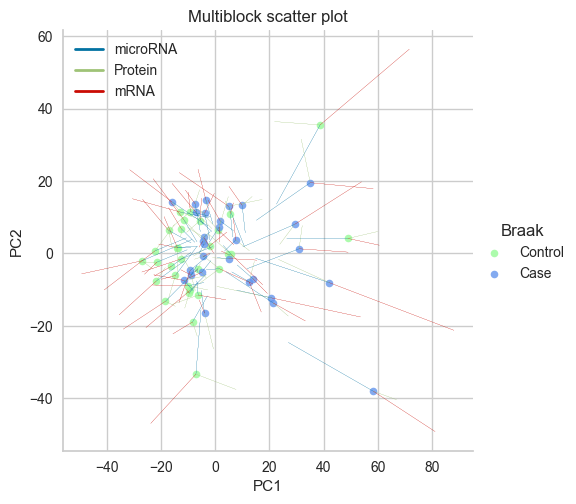

In [32]:
show_mRNA = True
show_mir = True
show_pr = True


sns.lmplot(
        x='PC1',
        y='PC2',
        data=pca_df,
        fit_reg=False,
        hue='Braak',
        scatter_kws={"s": 30}
        ,palette=['palegreen', 'cornflowerblue']
    )
for i, varnames in enumerate(df_mir_labelled.index):
    #plt.scatter(xs_avg[i], xs_avg[i], s=30,color='r',marker='>')



    if show_mir:
        plt.arrow(
            xs_avg[i], ys_avg[i],  # coordinates of arrow base
            ((-1*xs_avg[i])+xs_mir[i]),  # length of the arrow along x
            ((-1*ys_avg[i])+ys_mir[i]),  # length of the arrow along y
            color='b',
            head_width=0.01,
            width = 0.001
            ,linewidth=0.1

        )
    if show_pr:
        plt.arrow(
        xs_avg[i], ys_avg[i],  # coordinates of arrow base
        ((-1*xs_avg[i])+xs_pr[i]),  # length of the arrow along x
        ((-1*ys_avg[i])+ys_pr[i]), # length of the arrow along y
        color='g',
        head_width=0.01,
        width = 0.001
        ,linewidth=0.1
        )
    if show_mRNA:
        plt.arrow(
        xs_avg[i], ys_avg[i],  # coordinates of arrow base
        ((-1*xs_avg[i])+xs_mrna[i]),  # length of the arrow along x
        ((-1*ys_avg[i])+ys_mrna[i]), #  length of the arrow along y
        color='r',
        head_width=0.01,
        width = 0.001,
        linewidth=0.1
        )
    #plt.text(xs_pr[i], ys_pr[i], varnames)

xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
#plt.xticks(xticks)
#plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')


legend_elements = [Line2D([0], [0], color='b', lw=2, label='microRNA'),
                   Line2D([0], [0], color='g',lw=2, label='Protein'),
                   Line2D([0], [0], color='r', lw=2, label='mRNA')]

plt.legend(handles = legend_elements,loc='best')

plt.title('Multiblock scatter plot')
plt.show()

From the scatter plots above, we can see that our final model still has the separation that was remarked during the analysis of the PCAs of each component individually.

<br>
The multiblock plot shows us that mRNA still has the most influence on the average scores.



#### 2) Pick Bayes variables

For the BN construction, we order our data wrt the loading of the first component, then saving it for later use.

In [33]:
loading_mir = pd.DataFrame(onpls2.P[0], columns=['PC1', 'PC2'], index=mir_features)
loading_pr = pd.DataFrame(onpls2.P[1], columns=['PC1', 'PC2'], index=pr_features)
loading_mrna = pd.DataFrame(onpls2.P[2], columns=['PC1', 'PC2'], index=mrna_features)

top_n = 300
loadings_top = pd.DataFrame(columns=['microRNA','Protein','mRNA'])
#loadings_top['microRNA'] = loading_mir.sort_values(by='PC1',ascending=False).head(top_n).index.values
#loadings_top['Protein'] = loading_pr.sort_values(by='PC1',ascending=False).head(top_n).index.values
#loadings_top['mRNA'] = loading_mrna.sort_values(by='PC1',ascending=False).head(top_n).index.values

loadings_top['microRNA'] =  (np.abs(loading_mir['PC1']) - np.abs(loading_mir['PC2'])).sort_values(ascending=False).head(top_n).index.values
loadings_top['Protein'] =  (np.abs(loading_pr['PC1']) - np.abs(loading_pr['PC2'])).sort_values(ascending=False).head(top_n).index.values
loadings_top['mRNA'] =  (np.abs(loading_mrna['PC1']) - np.abs(loading_mrna['PC2'])).sort_values(ascending=False).head(top_n).index.values

#loadings_top.to_csv('BayesVariables_Allblocks_mRNACorrelation.csv')
loadings_top


,microRNA,Protein,mRNA
0,hsa-miR-26b-5p,Q96JE9-1,ENSG00000109320
1,hsa-miR-668-3p,O60313-2,ENSG00000162144
2,hsa-miR-19b-3p,Q02218,ENSG00000076108
3,hsa-miR-590-3p,Q9Y2J2,ENSG00000101974
4,hsa-miR-20a-5p,P63027,ENSG00000149311
...,...,...,...
295,hsa-miR-1185-5p,Q14289-1,ENSG00000103966
296,hsa-miR-181a-2-3p,O94985-2,ENSG00000214402
297,hsa-miR-411-3p,P06703,ENSG00000172671
298,hsa-miR-369-3p,P20336,ENSG00000166716


#### 3) Ellbow plot : GlobalComps vs R2Score

To gain more insights of our model, we will also plot the number of global components, along with how much variance each component explains.


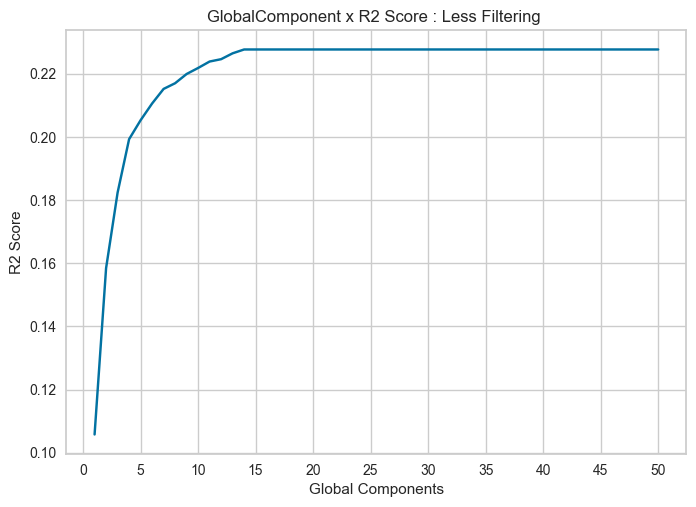

In [35]:
tmp1_df = pd.read_csv('Data\\PredictionCompxR2Score_Global.csv')

fig = plt.figure()
ax = plt.axes()
plt.title('GlobalComponent x R2 Score : Less Filtering ')
plt.ylabel('R2 Score')
plt.xlabel('Global Components')
plt.xticks(np.arange(0, max(tmp1_df['GlobalComps'].values)+1, 5.0))

ax.plot(tmp1_df['GlobalComps'].values,tmp1_df['Score'].values)

It looks like after 13 components the increase is very minimal, after 15 there is not increase. However, since we are only using the first component, we will unfortunately lose quite a bit of variance. Perhaps in future works, there can be more focus on incorporating a larger amount.

#### 4) Plot loadings withot scores,labels

Loadings shown: 
                     PC1       PC2
hsa-let-7a-3p   0.372478  0.020428
hsa-let-7a-5p   0.199496 -0.194522
hsa-let-7b-3p  -0.107703 -0.455528
hsa-let-7b-5p  -0.011844 -0.456127
hsa-let-7c-5p  -0.032966 -0.112782
...                  ...       ...
hsa-miR-98-5p   0.263674  0.080185
hsa-miR-9985    0.306985 -0.140974
hsa-miR-99a-5p  0.261442  0.042185
hsa-miR-99b-3p -0.161580 -0.062902
hsa-miR-99b-5p -0.050218 -0.287197

[362 rows x 2 columns]


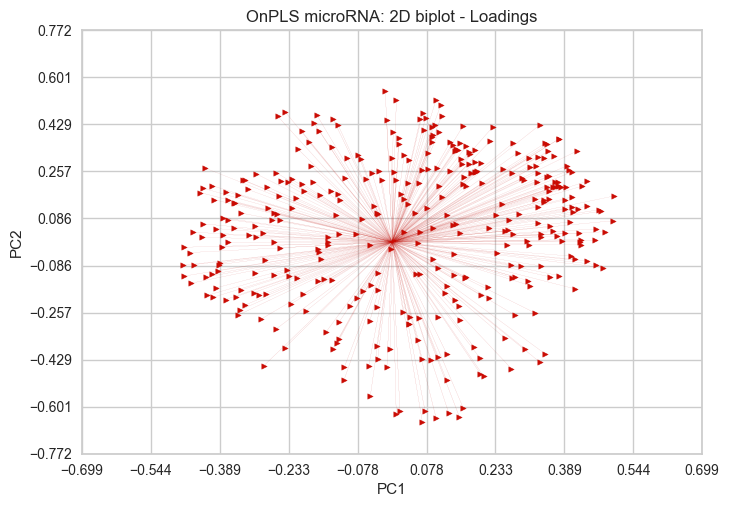

Loadings shown: 
               PC1       PC2
P68371   -0.038233 -0.112064
P04350   -0.119935 -0.219866
Q13885   -0.170686 -0.098847
Q9BVA1    0.111845 -0.182545
P07437    0.010555 -0.075360
...            ...       ...
P21266    0.109263  0.141953
Q96HN2-2 -0.052460 -0.068013
O75891-3  0.090737  0.041965
Q9Y617-1  0.210576 -0.016255
P47756-2  0.057507  0.084110

[362 rows x 2 columns]


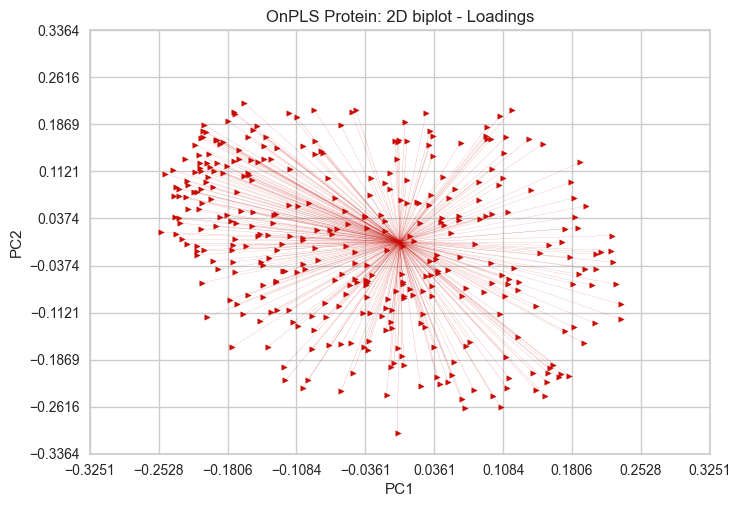

Loadings shown: 
                      PC1       PC2
ENSG00000252316  0.059902  0.008803
ENSG00000275830  0.080331  0.052220
ENSG00000120457  0.075157 -0.009910
ENSG00000233670  0.058556 -0.048054
ENSG00000026297  0.098224  0.120465
...                   ...       ...
ENSG00000180423  0.101700 -0.088115
ENSG00000165689  0.114891  0.009349
ENSG00000245149  0.016049  0.067467
ENSG00000261324  0.074351  0.037426
ENSG00000100416  0.082962  0.045624

[362 rows x 2 columns]


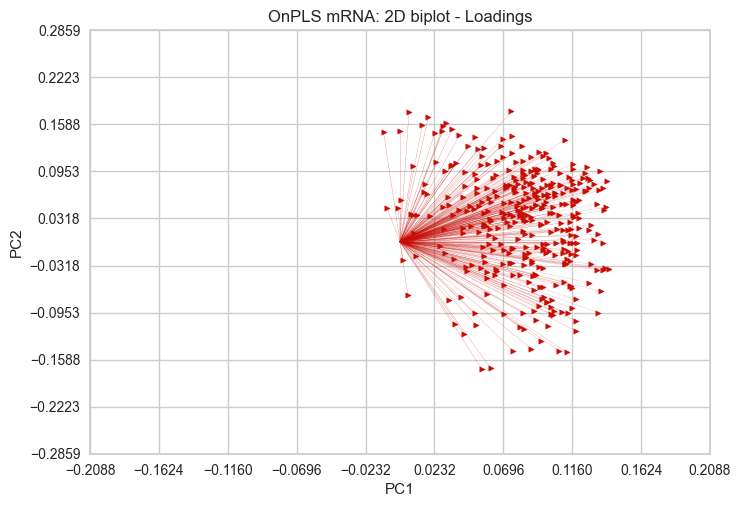

In [36]:
n_loadings=len(onpls2.P[0])

biplot2d_onpls(onpls2,df_mir_labelled,0,mir_features,n_loadings,'OnPLS microRNA: 2D biplot - Loadings',loading_PC1=False,loading_both=False,show_loading_labels=False,show_scores=False,show_all_loadings=True)
biplot2d_onpls(onpls2,df_pr_labelled,1,pr_features,n_loadings,'OnPLS Protein: 2D biplot - Loadings',loading_PC1=False,loading_both=False,show_loading_labels=False,show_scores=False,show_all_loadings=True)
biplot2d_onpls(onpls2, df_mrna_labelled, 2, mrna_features, n_loadings, 'OnPLS mRNA: 2D biplot - Loadings',loading_PC1=False,loading_both=False,show_loading_labels=False,show_scores=False,show_all_loadings=True)

From these plots  we can also see more clustering in direction of PC1, which is a good sign since Control/Case seems to be kinda separated by PC1.


However, for the loadings plot mRNA,there is a very noticeable difference, with the majority of the loadings being concentrated to the right, still along the PC1 axes. This is most definitely dues to the tageted selcection performed previously an

In [ ]:
# saving the data to be used in training the BN - now commneted out as files already saved
# df_mir_labelled.to_csv('mir_data_labelled.csv')
# df_pr_labelled.to_csv('pr_data_labelled.csv')
# df_mrna_labelled.to_csv('mrna_data_labelled.csv')
# df_pheno.to_csv('phenotype.csv')